# Disagreement

# Set up

In [ ]:
!git clone https://github.com/yu02019/BEN.git

Cloning into 'BEN'...
remote: Enumerating objects: 162, done.
remote: Counting objects: 100% (19/19), done.
remote: Compressing objects: 100% (18/18), done.
remote: Total 162 (delta 2), reused 10 (delta 0), pack-reused 143
Receiving objects: 100% (162/162), 6.47 MiB | 11.29 MiB/s, done.
Resolving deltas: 100% (46/46), done.


In [ ]:
cd BEN

/content/BEN


In [ ]:
!gdown --id 1qHJkloqTg25gcot74YXKweEdXkYBRx-X
!unzip data_for_disagree.zip

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1qHJkloqTg25gcot74YXKweEdXkYBRx-X
To: /content/BEN/data_for_disagree.zip
100% 38.0M/38.0M [00:00<00:00, 233MB/s]
Archive:  data_for_disagree.zip
   creating: annotation/
   creating: annotation/rater1/
  inflating: annotation/rater1/Macaque-sub-032183_ses-001_task-movie_run-2_bold-time4.nii.gz  
  inflating: annotation/rater1/Marmoset_M1_time4.nii.gz  
  inflating: annotation/rater1/Mouse-ASD_Xinhua_SJL_20191215_con01__E4_P1.nii.gz  
  inflating: annotation/rater1/Rat-sub-001_ses-2_acq-EPI_T2w.nii.gz  
   creating: annotation/rater2/
  inflating: annotation/rater2/Macaque-sub-032183_ses-001_task-movie_run-2_bold-time4.nii.gz  
  inflating: annotation/rater2/Marmoset_M1_time4.nii.gz  
  inflating: annotation/rater2/

In [ ]:
!pip install SimpleITK

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 48.4 MB 29 kB/s 


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from glob import glob
import os
from utils.load_data import get_itk_array, get_itk_image, write_itk_imageArray

In [ ]:
base_path = r'/content/BEN/'

experts_path_list = glob(base_path + r'/annotation/*')

experts_name = [os.path.basename(i) for i in experts_path_list]

nii_name = glob(base_path + r'/src/*')
nii_name = [os.path.basename(i) for i in nii_name]
nii_name.sort()  # Macaque Marmoset Mouse Rat

root_path = base_path + '/annotation'
label_list = glob(base_path + r'/label/*')
label_list.sort()
src_list = glob(base_path + r'/src/*')
src_list.sort()

smooth = 0.001
def dice_coef(y_true, y_pred):

    y_true_f = y_true.flatten()
    y_pred_f = y_pred.flatten()
    intersection = np.sum(y_true_f * y_pred_f)
    return (2. * intersection + smooth) / (np.sum(y_true_f) + np.sum(y_pred_f) + smooth)


''' load label '''
label = [] 
for i in range(4):
    nii = get_itk_array(label_list[i])
    label.append(nii)

 ## Compute rater disagreement and plot disagree map

In [ ]:
''' for mouse '''
# load all mouse annotation
mouse = []
for i in experts_name:
    nii = get_itk_array(os.path.join(root_path, i, nii_name[2]))
    print('Loading: ', os.path.join(root_path, i, nii_name[2]))
    mouse.append(nii)
mouse = np.array(mouse)  # got (7, 35, 90, 90)
# compute dice
for i in range(7):
    print('next iter')
    for j in range(7):
        expert1 = mouse[j]
        other = mouse[i]
        print(dice_coef(expert1, other))
# compute disagree
mouse_disagree = np.zeros_like(nii)
for i in range(7):
    mouse_disagree = mouse_disagree + mouse[i]
mouse_disagree[mouse_disagree == 7] = 0
mouse_disagree[mouse_disagree <= 0] = 0  

Loading:  /content/BEN//annotation/rater2/Mouse-ASD_Xinhua_SJL_20191215_con01__E4_P1.nii.gz
Loading:  /content/BEN//annotation/rater1/Mouse-ASD_Xinhua_SJL_20191215_con01__E4_P1.nii.gz
Loading:  /content/BEN//annotation/rater3/Mouse-ASD_Xinhua_SJL_20191215_con01__E4_P1.nii.gz
Loading:  /content/BEN//annotation/rater4/Mouse-ASD_Xinhua_SJL_20191215_con01__E4_P1.nii.gz
Loading:  /content/BEN//annotation/rater5/Mouse-ASD_Xinhua_SJL_20191215_con01__E4_P1.nii.gz
Loading:  /content/BEN//annotation/rater7/Mouse-ASD_Xinhua_SJL_20191215_con01__E4_P1.nii.gz
Loading:  /content/BEN//annotation/rater6/Mouse-ASD_Xinhua_SJL_20191215_con01__E4_P1.nii.gz
next iter
1.0
0.9301714833366423
0.9158938143212666
0.9373483529397912
0.9123833283556722
0.9542503875772698
0.9168508102179703
next iter
0.9301714833366423
1.0
0.9077997248386083
0.9224954640451684
0.9103335584197916
0.9241801242558388
0.9110084441351577
next iter
0.9158938143212666
0.9077997248386083
1.0
0.9194294819415364
0.8945464885576321
0.92708831

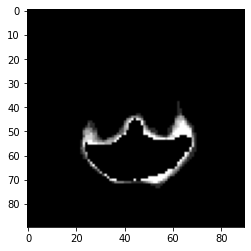

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(mouse_disagree[15],cmap='gray');plt.show()
# Disagree map in grayscale

In [ ]:
''' for rat '''
rat = []
for i in experts_name:
    nii = get_itk_array(os.path.join(root_path, i, nii_name[-1]))
    print('Loading: ', os.path.join(root_path, i, nii_name[-1]))
    rat.append(nii)
rat = np.array(rat)
# compute dice
for i in range(7):
    print('next iter')
    for j in range(7):
        expert1 = rat[j]
        other = rat[i]
        print(dice_coef(expert1, other))
# compute disagree
rat_disagree = np.zeros_like(nii)
for i in range(7):
    rat_disagree = rat_disagree + rat[i]
rat_disagree[rat_disagree == 7] = 0
rat_disagree[rat_disagree <= 0] = 0

Loading:  /content/BEN//annotation/rater2/Rat-sub-001_ses-2_acq-EPI_T2w.nii.gz
Loading:  /content/BEN//annotation/rater1/Rat-sub-001_ses-2_acq-EPI_T2w.nii.gz
Loading:  /content/BEN//annotation/rater3/Rat-sub-001_ses-2_acq-EPI_T2w.nii.gz
Loading:  /content/BEN//annotation/rater4/Rat-sub-001_ses-2_acq-EPI_T2w.nii.gz
Loading:  /content/BEN//annotation/rater5/Rat-sub-001_ses-2_acq-EPI_T2w.nii.gz
Loading:  /content/BEN//annotation/rater7/Rat-sub-001_ses-2_acq-EPI_T2w.nii.gz
Loading:  /content/BEN//annotation/rater6/Rat-sub-001_ses-2_acq-EPI_T2w.nii.gz
next iter
1.0
0.9471001157954545
0.9133876279249704
0.9341972555987718
0.9359116047390843
0.9418046764508329
0.8936688350919113
next iter
0.9471001157954545
1.0
0.9340727978083228
0.9501178778536138
0.9340028173759817
0.9567424343394755
0.9218265454023974
next iter
0.9133876279249704
0.9340727978083228
1.0
0.9328727297137189
0.9194561472158373
0.9434893020134457
0.9241068357923401
next iter
0.9341972555987718
0.9501178778536138
0.9328727297137

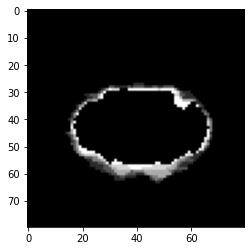

In [ ]:
plt.imshow(rat_disagree[5],cmap='gray');plt.show()

In [ ]:
''' for Macaque '''
macaque = []
for i in experts_name:
    nii = get_itk_array(os.path.join(root_path, i, nii_name[0]))
    print('Loading: ', os.path.join(root_path, i, nii_name[0]))
    macaque.append(nii)
macaque = np.array(macaque)
# compute dice
for i in range(7):
    print('next iter')
    for j in range(7):
        expert1 = macaque[j]
        other = macaque[i]
        print(dice_coef(expert1, other))
# compute disagree
macaque_disagree = np.zeros_like(nii)
for i in range(7):
    macaque_disagree = macaque_disagree + macaque[i]
macaque_disagree[macaque_disagree == 7] = 0
macaque_disagree[macaque_disagree <= 0] = 0

Loading:  /content/BEN//annotation/rater2/Macaque-sub-032183_ses-001_task-movie_run-2_bold-time4.nii.gz
Loading:  /content/BEN//annotation/rater1/Macaque-sub-032183_ses-001_task-movie_run-2_bold-time4.nii.gz
Loading:  /content/BEN//annotation/rater3/Macaque-sub-032183_ses-001_task-movie_run-2_bold-time4.nii.gz
Loading:  /content/BEN//annotation/rater4/Macaque-sub-032183_ses-001_task-movie_run-2_bold-time4.nii.gz
Loading:  /content/BEN//annotation/rater5/Macaque-sub-032183_ses-001_task-movie_run-2_bold-time4.nii.gz
Loading:  /content/BEN//annotation/rater7/Macaque-sub-032183_ses-001_task-movie_run-2_bold-time4.nii.gz
Loading:  /content/BEN//annotation/rater6/Macaque-sub-032183_ses-001_task-movie_run-2_bold-time4.nii.gz
next iter
1.0
0.9501320118446379
0.9572022029154338
0.9461854336243485
0.9439363688597727
0.9607498537591235
0.9504923184020228
next iter
0.9501320118446379
1.0
0.9469417555314174
0.9436090228737505
0.9388726764902471
0.9529029821835017
0.9401984593837407
next iter
0.9572

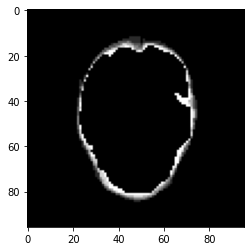

In [ ]:
 plt.imshow(macaque_disagree[35],cmap='gray');plt.show()

In [ ]:
''' for Marmoset '''
marmoset = []
for i in experts_name:
    nii = get_itk_array(os.path.join(root_path, i, nii_name[1]))
    print('Loading: ', os.path.join(root_path, i, nii_name[1]))
    marmoset.append(nii)
marmoset = np.array(marmoset)
# compute dice
for i in range(7):
    print('next iter')
    for j in range(7):
        expert1 = marmoset[j]
        other = marmoset[i]
        print(dice_coef(expert1, other))
# compute disagree
marmoset_disagree = np.zeros_like(nii)
for i in range(7):
    marmoset_disagree = marmoset_disagree + marmoset[i]
marmoset_disagree[marmoset_disagree == 7] = 0
marmoset_disagree[marmoset_disagree <= 0] = 0  

Loading:  /content/BEN//annotation/rater2/Marmoset_M1_time4.nii.gz
Loading:  /content/BEN//annotation/rater1/Marmoset_M1_time4.nii.gz
Loading:  /content/BEN//annotation/rater3/Marmoset_M1_time4.nii.gz
Loading:  /content/BEN//annotation/rater4/Marmoset_M1_time4.nii.gz
Loading:  /content/BEN//annotation/rater5/Marmoset_M1_time4.nii.gz
Loading:  /content/BEN//annotation/rater7/Marmoset_M1_time4.nii.gz
Loading:  /content/BEN//annotation/rater6/Marmoset_M1_time4.nii.gz
next iter
1.0
0.9460851220757115
0.9352209363325451
0.937096457994018
0.9463327052360389
0.9431049384067774
0.9397214690422796
next iter
0.9460851220757115
1.0
0.9257148826358556
0.9388745980130694
0.9416307748843239
0.9496017361500149
0.9420279581702271
next iter
0.9352209363325451
0.9257148826358556
1.0
0.9412810181611693
0.9164772145696685
0.940650728920941
0.9403250135646672
next iter
0.937096457994018
0.9388745980130694
0.9412810181611693
1.0
0.9292568147459445
0.955945322107148
0.9368175010149409
next iter
0.94633270523

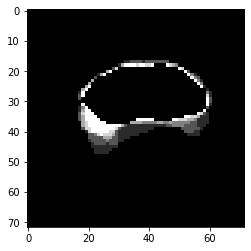

In [ ]:
 plt.imshow(marmoset_disagree[25],cmap='gray');plt.show()

In [ ]:
'''
compare each expert with label
'''
for i in range(mouse.shape[0]):
    print(dice_coef(mouse[i], label[2]))

for i in range(rat.shape[0]):
    print(dice_coef(rat[i], label[-1]))

for i in range(macaque.shape[0]):
    print(dice_coef(macaque[i], label[0]))

for i in range(marmoset.shape[0]):
    print(dice_coef(marmoset[i], label[1]))


0.924800647905505
0.9304040123266487
0.9254200712142103
0.9285731721761364
0.9024846403593462
0.9299798414225342
0.9216016728394372
0.9349507347014198
0.9460298256744446
0.9345196538652284
0.9395017816257059
0.9224325074280298
0.950943398059279
0.9112578086973128
0.9513498700761964
0.9978514972845848
0.9478718371471143
0.9436301511609483
0.939280540465951
0.9540659977678873
0.9415566611557646
0.9449489024507904
0.9528790155108107
0.9458066062206427
0.9567606864970538
0.939698219822813
0.9639035532190121
0.9510776132564975


# Plot raters' annotations and expert consensus annotations.

In [ ]:
from skimage import measure


def draw_2D_contours(pred, src=None, ax1=None, color='gray', linewidth=2):
    our = pred  # (90, 90)

    contours = measure.find_contours(our, 0.5)

    for n, contour in enumerate(contours):
        ax1.plot(contour[:, 1], contour[:, 0], linewidth=linewidth, color=color, alpha=0.6)  

def draw_contours(pred=None, pred_our=None, gt=None, src=None, save_img=None, colorbar=None, linewidth=2.0):
    """

    :param pred:
    :param pred_our:
    :param gt:
    :param src:
    :param save_img:
    :param colorbar: 
    :return:
    """
    our = pred  # (90, 90) or (7(num of nii), 90, 90)
    rawimg = src

    fig, ax1 = plt.subplots(1, 1)
    ax1.imshow(rawimg, plt.cm.gray) 

    if type(our) != type(None):
        if our.ndim >= 3:
            for i in range(our.shape[0]):
                if colorbar == None:
                    draw_2D_contours(pred=our[i], src=src,
                                     color=None,
                                     ax1=ax1, linewidth=linewidth)  # 'gray'
                elif colorbar != None:
                    draw_2D_contours(pred=our[i], src=src,
                                     color=colorbar[i],
                                     ax1=ax1, linewidth=linewidth)
        else:
            draw_2D_contours(pred=our, src=src, ax1=ax1, linewidth=linewidth)

    if pred_our is not None:
        contours_pred_our = measure.find_contours(pred_our, 0.5)
        for n, contour in enumerate(contours_pred_our):  # mask
            ax1.plot(contour[:, 1], contour[:, 0], linewidth=linewidth, color='red', alpha=0.7
                     # linestyle='--',  
                     )

    if gt is not None:
        contours_gt = measure.find_contours(gt, 0.5)
        for n, contour in enumerate(contours_gt):  # mask
            ax1.plot(contour[:, 1], contour[:, 0], linewidth=linewidth, color='red', alpha=0.6)  # deepskyblue

    if save_img:  # filename
        fig.savefig(save_img)
        pass
    # plt.show()

In [ ]:
# load raw image
nii_mouse = get_itk_array(src_list[2])
nii_rat = get_itk_array(src_list[3])
nii_macaque = get_itk_array(src_list[0])
nii_marmoset = get_itk_array(src_list[1])

# load our model prediction
nii_mouse_our = get_itk_array(r'BEN_predict/ASD_Xinhua_SJL_20191215_con01__E4_P1.nii.gz')
nii_rat_our = get_itk_array(r'BEN_predict/sub-001_ses-2_acq-EPI_T2w.nii.gz')
nii_marmoset_our = get_itk_array(r'BEN_predict/M1_time4.nii.gz')
nii_macaque_our = get_itk_array(r'BEN_predict/sub-032183_ses-001_task-movie_run-2_bold-time4.nii.gz')


In [ ]:
from utils.transparent_imshow import transp_imshow, plot_no_margin

colors = sns.color_palette('Set2');

In [ ]:
fig, ax = plt.subplots(1, 1)  # init fig
plt.clf()

<Figure size 432x288 with 0 Axes>

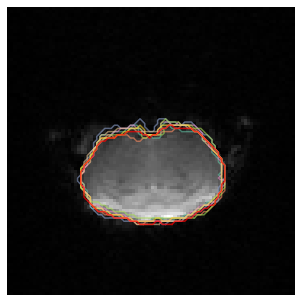

In [ ]:
''' mouse '''
# raters' annotation
# fig, ax = plt.subplots(1, 1)
draw_contours(pred=mouse[:, 21, :, :], pred_our=nii_mouse_our[21], linewidth=1.5,
              # gt=mouse[1, 21],
              src=nii_mouse[21], colorbar=colors)
plot_no_margin(img=nii_mouse_our[21], fig=fig)
plt.show()

Annotations by junior raters (n=7) shown as opaque lines of different colors.

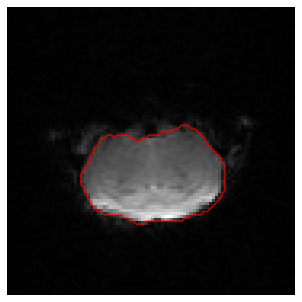

In [ ]:
# raw & gt
# fig, ax = plt.subplots(1, 1)
draw_contours(gt=mouse[1, 21],
              src=nii_mouse[21], colorbar=colors)
plot_no_margin(img=nii_mouse_our[21], fig=fig)
# plt.savefig('Mouse_raw&GT.png', dpi=600)
plt.show()

Expert consensus annotations (**<font color='#FF000'>red</font>** opaque lines).

(similarly hereinafter)




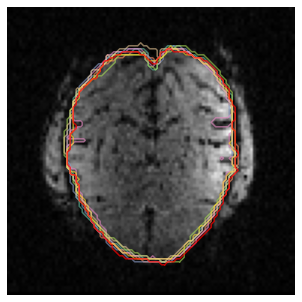

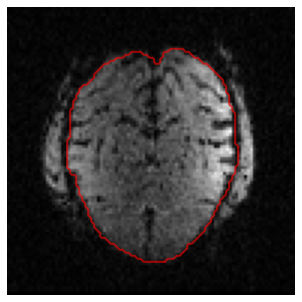

In [ ]:
''' Macaque '''
# raters' annotation
draw_contours(pred=macaque[:, 30], pred_our=nii_macaque_our[30], linewidth=1.5,
              # gt=macaque[1, 30],
              src=nii_macaque[30], colorbar=colors)
plot_no_margin(img=nii_macaque_our[30], fig=fig)
plt.show()

# raw & gt
draw_contours(gt=macaque[1, 30],
              src=nii_macaque[30], colorbar=colors)
plot_no_margin(img=nii_macaque_our[30], fig=fig)
plt.show()

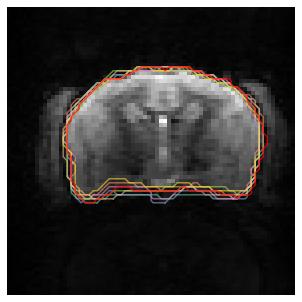

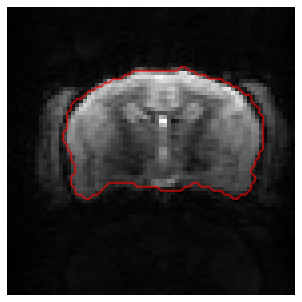

In [ ]:
''' Marmoset '''
# raters' annotation
draw_contours(pred=marmoset[:, 20], pred_our=nii_marmoset_our[20], linewidth=1.5,
              # gt=marmoset[1, 20],
              src=nii_marmoset[20], colorbar=colors)
plot_no_margin(img=nii_marmoset_our[20], fig=fig)
plt.show()

# raw & gt
draw_contours(gt=marmoset[1, 20],
              src=nii_marmoset[20], colorbar=colors)
plot_no_margin(img=nii_marmoset_our[20], fig=fig)
plt.show()

# Plot disagree map


(35, 90, 90)
(7, 35, 90, 90)


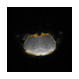

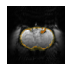

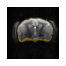

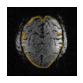

In [ ]:
print(mouse_disagree.shape)
print(mouse.shape)

from utils.transparent_imshow import transp_imshow, plot_no_margin

cmap = 'Wistia'
# Mouse
fig, ax = plt.subplots()  
plt.imshow(nii_mouse[21], cmap='gray')
plot_no_margin(img=nii_mouse[21], fig=fig)
# plt.savefig('Mouse_raw.png', dpi=600)
transp_imshow(mouse_disagree[21], cmap=cmap, alpha=0.6)
# plt.savefig('Mouse.png', dpi=600)
plt.show()
# Rat
fig, ax = plt.subplots()  
plt.imshow(nii_rat[8], cmap='gray')
plot_no_margin(img=nii_rat[8], fig=fig)
# plt.savefig('Rat.png', dpi=600)
transp_imshow(rat_disagree[8], cmap=cmap, alpha=0.6)
# plt.savefig('Rat_raw.png', dpi=600)
plt.show()
# Marmoset
fig, ax = plt.subplots()  
plt.imshow(nii_marmoset[20], cmap='gray')
plot_no_margin(img=nii_marmoset[20], fig=fig)
# plt.savefig('Marmoset_raw.png', dpi=600)
transp_imshow(marmoset_disagree[20], cmap=cmap, alpha=0.6)
# plt.savefig('Marmoset.png', dpi=600)
plt.show()
# Macaque
fig, ax = plt.subplots()  
plt.imshow(nii_macaque[30], cmap='gray')
plot_no_margin(img=nii_macaque[30], fig=fig)
# plt.savefig('Macaque_raw.png', dpi=600)
transp_imshow(macaque_disagree[30], cmap=cmap, alpha=0.6)
# plt.savefig('Macaque.png', dpi=600)
plt.show()

From top row to the fourth row: Disagree map for mouse, rat, marmoset and macaque.

# Plot uncertainty map

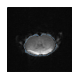

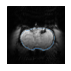

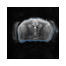

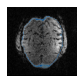

In [ ]:
'''
plot UC map
'''
# load UC map
mouse_uc = get_itk_array(r'BEN_uc/Mouse-pred-uc-sample/alea_ASD_Xinhua_SJL_20191215_con01__E4_P1.nii.gz')
rat_uc = get_itk_array(r'BEN_uc/Rat-pred-uc-sample/alea_sub-001_ses-2_acq-EPI_T2w.nii.gz')
marmoset_uc = get_itk_array(r'BEN_uc/Marmoset-pred-uc-sample/alea_M1_time4.nii.gz')
macaque_uc = get_itk_array(r'BEN_uc/Macaque-pred-uc-sample/alea_sub-032183_ses-001_task-movie_run-2_bold-time4.nii.gz')

cmap = 'Blues'  
# Mouse
fig, ax = plt.subplots()  
plt.imshow(nii_mouse[22], cmap='gray')
plot_no_margin(img=nii_mouse[22], fig=fig)
transp_imshow(mouse_uc[22], cmap=cmap, )
plt.savefig('Mouse_uc.png', dpi=600)
plt.show()
# Rat
fig, ax = plt.subplots()  
plt.imshow(nii_rat[8], cmap='gray')
plot_no_margin(img=nii_rat[8], fig=fig)
transp_imshow(rat_uc[8], cmap=cmap, )
plt.savefig('Rat_uc.png', dpi=600)
plt.show()
# Marmoset
fig, ax = plt.subplots()  
plt.imshow(nii_marmoset[20], cmap='gray')
plot_no_margin(img=nii_marmoset[20], fig=fig)
transp_imshow(marmoset_uc[20], cmap=cmap, )
plt.savefig('Marmoset_uc.png', dpi=600)
plt.show()
# Macaque
fig, ax = plt.subplots()  
plt.imshow(nii_macaque[30], cmap='gray')
plot_no_margin(img=nii_macaque[30], fig=fig)
transp_imshow(macaque_uc[30], cmap=cmap, )
plt.savefig('Macaque_uc.png', dpi=600)
plt.show()


From top row to the fourth row: Uncertainty map for mouse, rat, marmoset and macaque.

# Compute Dice

Dice score comparisons between the ground truth and the BEN segmentation results (red) as well as the ground truth and the junior raters’ annotations (gray) for all species

In [ ]:
''' compute Dice from 7 UC samples '''
from glob import glob

# mouse
print('Mouse')
sample_mosue_list = glob(r'BEN_uc/Mouse-pred-uc-sample/?_*')
label = get_itk_array(r'label/Mouse-ASD_Xinhua_SJL_20191215_con01__E4_P1.nii.gz')
for i in sample_mosue_list:
    nii = get_itk_array(i)
    nii[nii >= 0.5] = 1
    nii[nii < 0.5] = 0
    print(dice_coef(nii, label))
# rat
print('Rat')
sample_rat_list = glob(r'BEN_uc/Rat-pred-uc-sample/?_*')
label = get_itk_array(r'label/Rat-sub-001_ses-2_acq-EPI_T2w.nii.gz')
for i in sample_rat_list:
    nii = get_itk_array(i)
    nii[nii >= 0.5] = 1
    nii[nii < 0.5] = 0
    print(dice_coef(nii, label))

# marmoset
print('marmoset')
sample_marmoset_list = glob(r'BEN_uc/Marmoset-pred-uc-sample/?_*')
label = get_itk_array(r'label/Marmoset_M1_time4.nii.gz')
for i in sample_marmoset_list:
    nii = get_itk_array(i)
    nii[nii >= 0.5] = 1
    nii[nii < 0.5] = 0
    print(dice_coef(nii, label))

# macaque
print('macaque')
sample_macaque_list = glob(r'BEN_uc/Macaque-pred-uc-sample/?_*')
label = get_itk_array(r'label/Macaque-sub-032183_ses-001_task-movie_run-2_bold-time4.nii.gz')
for i in sample_macaque_list:
    nii = get_itk_array(i)
    nii[nii >= 0.5] = 1
    nii[nii < 0.5] = 0
    print(dice_coef(nii, label))


Mouse
0.943130513413093
0.9442203053053972
0.9419086179746714
0.9398973415796233
0.942990152689308
0.9409841439318026
0.9417298525290215
Rat
0.9487328462445412
0.9484970759823692
0.952672424939978
0.95378779757859
0.951358825941033
0.9530264949154005
0.9556019195636353
marmoset
0.9004154807740301
0.9006371574937834
0.8952654251939588
0.897612950632718
0.8929085323197509
0.8982393334407763
0.8988044266303321
macaque
0.9030986550939324
0.89851076604456
0.9011020067986366
0.9041558554179341
0.905173984354242
0.8958449614905122
0.896997740334676


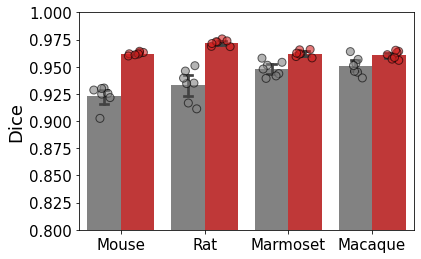

In [ ]:

'''
plot Dice expert VS uc sample
'''

import seaborn as sns

colors = sns.color_palette("Greys")[2:4]
colors.pop(0)
colors.append(sns.color_palette("Reds")[4])
# sns.palplot(colors)
# plt.show()

data = pd.read_excel(r'Fig7-sample-Dice.xlsx')

sns.barplot(data=data, x='Species', y='Dice', hue='Method',
            capsize=.1,  
            palette=colors,
            )
sns.stripplot(data=data, x='Species', y='Dice', hue='Method',
              dodge=True,  
              jitter=0.25,
              alpha=0.6,
              size=8,
              palette=colors,
              edgecolor='black', 
              linewidth=1,  
              )

plt.legend('', frameon=False)  
plt.ylim([0.8, 1.0])
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel(xlabel='')
plt.ylabel(ylabel='Dice', fontsize=18)
plt.show()


Bar plots showing the Dice score comparisons between the ground truth and the BEN segmentation results (red) as well as the ground truth and the junior raters’ annotations (gray) for all species. (gray: raters, n=7, red: Monte Carlo samples from BEN, n=7). Each dot represents one rater or one sample.